**Matrix Factorisation**

Matrix factorisation is an algorithm for collaborative filtering. The idea behind this algorithm is to take in a matrix of size nxm. Each row describes a user and each column describes the item being recommended. The value in the matrix describes the rating that the user has given to the piece of media.

In order to make predictions on what rating users might give to users, we factorise the matrix into smaller matrices. One way to do this is to conduct singular value decomposition, turing a matrix R into USV_T. However, in this notebook, I am going to use stochastic gradient descent to create two matrices (P and Q). P is a user matrix that is size nxf and Q is an item matrix that is size fxm.

This is helpful for two reasons. Firstly, the size of P and Q will be significantly smaller that the original matrix R. Secondly, we can get the predicted ratings from the values if the matrix P * Q (You won't need to multiply the whole matrix, just the columns for the user and item from P and Q).

The following notebook creates a mock matrix R and creates predictions for each person's rating using the previous method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create Review Matrix

R = np.array([[0, 4.5, 2, 0],
             [4, 0, 3.5, 0],
             [0, 5, 0, 2],
             [0, 3.5, 4, 1]])

In [3]:
#Helper functions for later

#Given a P and a Q, we can get the predicted recommendation fror user u and item i
def get_pred(u, i):
    return np.matmul((P[u, :]), (Q[:, i]))

#calculate the error between the prediction and reality
def get_error(u, i):
    return R[u,i] - get_pred(u,i)

#calculate the square norm of the user and item vectors
def get_sum_sqr_mag(u, i):
    return sum(map (lambda x : x**2, P[u, :])) + sum(map (lambda x : x**2, Q[:, i]))

[[2.17801784 2.10030738 1.99123714 0.74034221]
 [3.97370878 3.88386897 3.49449518 1.43415376]
 [4.96419715 4.9663041  4.06077455 1.97528999]
 [3.80633101 3.49252163 3.95435225 1.0079171 ]]


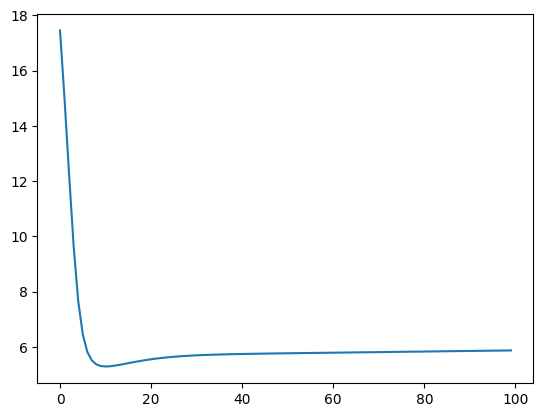

In [4]:
f = 2


#Initialise random P and Q matrices
r_shape = np.shape(R)
rows = r_shape[0]
columns = r_shape[1]
P = np.random.rand(columns, f)
Q = np.random.rand(f, rows)

losses = []

reg_param = 0.02
learning_rate = 0.05
epochs = 100
for n in range(epochs):
    for u in range(np.shape(R)[0]):
        for i in range(np.shape(R)[1]):
            #only update values that are observed, 0 means no rating
            if R[u,i] == 0:
                continue

            err = get_error(u,i)
            
            #calculate the loss of user 0 and item 1 for graphing later
            #we also continue to reserve this from the training set to
            #check for overfitting
            if u == 0 and i == 1:
                loss = err ** 2 + reg_param * get_sum_sqr_mag(u,i)
                losses.append(loss)
                continue

            #calculate and add on loss gradients
            for k in range(f):
                P[u,k] += learning_rate * (Q[k,i] * err - reg_param * P[u,k])
                Q[k,i] += learning_rate * (P[u,k] * err - reg_param * Q[k,i])


plt.plot(range(len(losses)), losses)
print(np.matmul(P,Q))

In this graph we can see that the loss minimissed at just above 3. This would probably improved with the addition of more data. We also find that after a relatively small amount of epochs, the model does start to overfit more and more, plateauing at around 7.